<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/SQL/Oracle_SQL_Developer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.oracle.com/tools/downloads/sqldev-downloads.html  
Windows 32-bit/64-bit  
관리자권한으로 실행  
이전에 설치한 거 임포트 하시겠습니까? 아니오  

C:\Program Files\Java\jdk1.8.0_291\jre\lib\ext  
ojdbc 3개 파일 지우기


SCOTT@//localhost:1521/xe

새접속 - MyDB -  
사용자이름 MYDB  
비밀번호 admin1234  

## 뷰 : 논리적개념
- Restricted data access : 권한범위 안에서만 가능
- Isolate applications from changes in definitions of base tables : 뷰가 참조하지 않는 나머지 컬럼이 변경되어도 뷰를 사용하는 다른 프로그램들은 영향을 받지 않음
- Present the data in different perpspective : 원본 테이블에 영향을 주지않고 다른 이름으로 참조 가능
- Simplify statement for the user : select 구문만으로 결과조회 가능
- Hide data complexity : 복잡한 sql 구문 숨기기
- Save complex queries : 복잡한 sql구문을 저장해서 반복적으로 사용가능


- CREATE OR REPLACE : 생성 또는 동일 이름이 존재하면 수정
- NOFORCE : 베이스테이블이 존재해야만 뷰 생성
- FORCE : 베이스테이블이 존재하지 않아도 뷰 생성
- alias : 뷰에서 사용되는 컬럼명, 서브쿼리에서 사용한 SELECT LIST 개수와 일치
- WITH CHECK OPTION(디폴트) : DML 허용, 원본테이블 편집가능
- WITH READ ONLY : DML 허용 안 함, SELECT만 가능

In [ ]:
CREATE OR REPLACE VIEW V_EMP
AS SELECT ENAME, DEPTNO
FROM EMP
WHERE DEPTNO = 30;

select * from v_emp;

In [ ]:
select * 
from user_tab_cols
where table_name = 'V_EMP';

SELECT * 
FROM USER_TAB_COLS
WHERE TABLE_NAME = 'V_EMP';

In [ ]:
CREATE OR REPLACE VIEW V_EMP_DEPT
AS SELECT ENAME, DNAME, JOB
FROM EMP
LEFT JOIN DEPT USING(DEPTNO);

SELECT *
FROM V_EMP_DEPT;

In [ ]:
# ALIAS
CREATE OR REPLACE VIEW V_EMP_DEPT02(M_NAME, M_DNAME, M_JOB)
AS SELECT ENAME, DNAME, JOB
FROM EMP
LEFT JOIN DEPT USING(DEPTNO);

SELECT *
FROM V_EMP_DEPT02;

In [ ]:
SELECT *
FROM V_EMP;

# 베이스테이블에 값 추가
INSERT INTO EMP(EMPNO, ENAME, DEPTNO) VALUES(111, '111', 30);

# 뷰테이블에 반영됨
SELECT *
FROM V_EMP;

In [ ]:
# 뷰테이블에서 수정한 것이 원본테이블에도 반영됨
# WITH CHECK OPTION이 디폴트
UPDATE V_EMP
SET DEPTNO = NULL;

SELECT *
FROM EMP;

ROLLBACK;

In [ ]:
CREATE OR REPLACE VIEW V_EMP
AS SELECT *
FROM EMP
WITH READ ONLY;

In [ ]:
# 구조만 가져오기
CREATE TABLE EMP_TEST
AS SELECT ENAME, SAL
FROM EMP
WHERE 1=0;

ALTER TABLE EMP_TEST
ADD MARRIAGE CHAR(2);

DESC EMP_TEST

INSERT INTO EMP_TEST VALUES(1, 3000, 'Y');
INSERT INTO EMP_TEST VALUES(2, 2000, 'Y');
INSERT INTO EMP_TEST VALUES(3, 5000, 'N');
INSERT INTO EMP_TEST VALUES(4, 7000, 'Y');
INSERT INTO EMP_TEST VALUES(5, 1000, 'N');
INSERT INTO EMP_TEST VALUES(6, 5000, 'Y');

CREATE OR REPLACE VIEW V_EMP
AS SELECT *
FROM EMP_TEST
WHERE MARRIAGE = 'N'
WITH CHECK OPTION; # WHERE문이 있을 때는 반드시 명시

INSERT INTO EMP_TEST VALUES(7, 5000, 'Y');

INSERT INTO V_EMP VALUES(8, 5000, 'N'); # 가능
INSERT INTO V_EMP VALUES(8, 5000, 'Y'); # 불가능


SELECT VIEW_NAME, TEXT
FROM USER_VIEWS
WHERE VIEW_NAME = 'V_EMP';

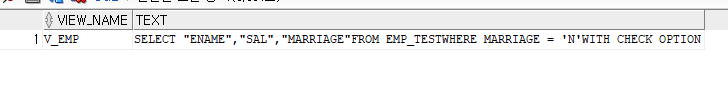

In [ ]:
# 별칭에 더블이
CREATE OR REPLACE VIEW V_EMP_DEPT02("M_NAME", "M_DNAME", "M_JOB")
AS SELECT ENAME, DNAME, JOB
FROM EMP
LEFT JOIN DEPT USING(DEPTNO);

SELECT M_NAME, M_JOB
FROM V_EMP_DEPT02;
WHERE M_JOB='CLERK';

SELECT M_NAME, M_JOB
FROM V_EMP_DEPT02
WHERE "M_JOB"='CLERK';

CREATE VIEW V_EMP_DEPT02("M_NAME", "M_DNAME", "M_JOB")
AS SELECT ENAME, DNAME, JOB
FROM EMP
LEFT JOIN DEPT USING(DEPTNO);

DROP VIEW V_EMP_DEPT02;

In [ ]:
# 부서별 평균 월급보다 더 많은 월급을 받는 사원과 월급을 출력
CREATE OR REPLACE VIEW V_DEPT_SALAVG("Did", "Davg")
AS SELECT NVL(DEPTNO, 10), ROUND(AVG(SAL), -1)
FROM EMP
GROUP BY DEPTNO;

SELECT ENAME, SAL
FROM EMP
JOIN V_DEPT_SALAVG ON (NVL(DEPTNO, 10) = "Did")
WHERE SAL > "Davg"
ORDER BY 2 DESC;

# 인라인뷰로 구현
SELECT ENAME, SAL
FROM (SELECT NVL(DEPTNO, 10) AS "Did", ROUND(AVG(SAL), -1) AS "Davg"
FROM EMP
GROUP BY DEPTNO    
) V_DEPT_SALAVG
JOIN EMP 
ON (NVL(DEPTNO, 10) = V_DEPT_SALAVG."Did")
WHERE SAL > V_DEPT_SALAVG."Davg"
ORDER BY 2 DESC;

SQL Language Reference : https://docs.oracle.com/cd/E11882_01/server.112/e41084/toc.htm

PL/SQL : https://docs.oracle.com/en/database/oracle/oracle-database/12.2/lnpls/overview.html#GUID-8514540B-FE23-41E1-9F72-AB8D726DEE8F

## PL/SQL : 프로시저 생성
- Procedural Language, Oracle's Procedural Language Extension to SQL
- 오라클 DB환경에서 실행되는 절차적인 데이터베이스 프로그래밍 언어
- 객체지향이 아님! 순서대로 실행!
- 프로그램단위 : BLOCK
- 변수정의, 조건처리, 반복문, Procedure Language
- 장점 : 모듈화(.sql)

<< label >> (optional)
DECLARE    -- Declarative part (optional)
  -- Declarations of local types, variables, & subprograms

BEGIN      -- Executable part (required)
  -- Statements (which can use items declared in declarative part)

[EXCEPTION -- Exception-handling part (optional)
  -- Exception handlers for exceptions (errors) raised in executable part]
END;

In [ ]:
CREATE OR REPLACE PROCEDURE EX_PRO AS 
BEGIN
DBMS_OUTPUT.PUT_LINE('1. HELLO WORLD.');
END EX_PRO;

In [ ]:
SET SERVEROUTPUT ON  # 화면출력

BEGIN
DBMS_OUTPUT.DISABLE;
DBMS_OUTPUT.PUT_LINE('111111111111');
DBMS_OUTPUT.ENABLE;
DBMS_OUTPUT.PUT_LINE('22222222');
END;
/  # 실행

In [ ]:
CREATE OR REPLACE PROCEDURE EX_PRO01 AS 
i number := 20; --지역변수
BEGIN
dbms_output.put_line('현재의 값은 ?' || ' ' || i);
END EX_PRO01;

In [ ]:
create or replace PROCEDURE EX_PRO02 AS 
i number := 100; --지역변수
j number := 200;
BEGIN
dbms_output.put_line(i || '+' || j || '=' || (i+j));
END EX_PRO02;

In [ ]:
CREATE OR REPLACE PROCEDURE EX_PRO3 AS 
i int := 10;
BEGIN
  if i != 20 then
  dbms_output.put_line('i=' || i);
  end if;
END EX_PRO3;

In [ ]:
CREATE OR REPLACE PROCEDURE EX_PRO3 AS 
score01 int := 85;  -- 변수
grade varchar2(3);  -- 데이터타입 선언
BEGIN
  if score01 >= 90 then GRADE := 'A';
  ELSIF score01 >= 80 then GRADE := 'B';
  ELSIF score01 >= 70 then GRADE := 'C';
  ELSIF score01 >= 60 then GRADE := 'D';
  ELSE GRADE := 'F';
  END IF;
  DBMS_OUTPUT.PUT_LINE('SCORE : ' || SCORE01 || ' GRADE: ' || GRADE);
END EX_PRO3;